<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/DoAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.feature import hog


In [2]:
FJoin  = os.path.join

In [ ]:
from google.colab import files
files.upload()

Saving file.zip to file.zip


In [ ]:
!unzip file.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18373.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18374.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18375.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18376.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18377.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18378.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18379.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18750.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18751.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/18752.jpg  
  inflating: content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ũ/1875

In [ ]:
folder = '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset'

In [ ]:
n_testcase = len(os.listdir(folder))
print(n_testcase)

89


In [ ]:
list_char = sorted(os.listdir(folder))
print((list_char))

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [ ]:
link_folder = [FJoin(folder, f) for f in list_char]
print(link_folder)

['/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/a', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/à', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/á', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/â', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ầ', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ấ', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ẫ', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ẩ', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ã', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ă', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ằ', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ắ', '/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/ẵ', '/content/content/mount/MyDrive

In [ ]:
size_img = []
for f in link_folder:
    list_img_link = [FJoin(f, img_link) for img_link in os.listdir(f)]
    for img_link in list_img_link:
        img = Image.open(img_link)
        size_img.append(img.size)
df = pd.DataFrame(size_img, columns=['width', 'height'])
df.describe()

,width,height
count,14849.000000,14849.000000
mean,54.695400,63.144589
std,1.809921,3.832942
min,52.000000,58.000000
25%,52.000000,58.000000
50%,56.000000,66.000000
75%,56.000000,66.000000
max,58.000000,68.000000


- chiều rộng nhỏ nhất : 52 
- chiều dài nhỏ nhất : 58 

=> resize tất cả các ảnh về size (52, 58) 

In [ ]:
for f in link_folder:
    list_img_link = [FJoin(f, img_link) for img_link in os.listdir(f)]
    for img_link in list_img_link:
        img = Image.open(img_link)
        img = img.resize((52, 58))
        img.save(img_link)

In [ ]:
size_img = []
for f in link_folder:
    list_img_link = [FJoin(f, img_link) for img_link in os.listdir(f)]
    for img_link in list_img_link:
        img = Image.open(img_link)
        size_img.append(img.size)
df = pd.DataFrame(size_img, columns=['width', 'height'])
df.describe()

,width,height
count,14849.0,14849.0
mean,52.0,58.0
std,0.0,0.0
min,52.0,58.0
25%,52.0,58.0
50%,52.0,58.0
75%,52.0,58.0
max,52.0,58.0


- Một số ảnh bị dính viền, và bị nhòe khi cắt ảnh.

=> Crop ảnh và grayscale 

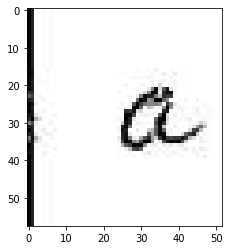

In [ ]:
plt.imshow(Image.open('/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/a/7103.jpg'))

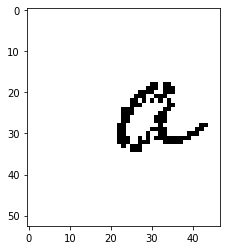

In [ ]:
img = Image.open('/content/content/mount/MyDrive/VietnameseHandWritingDataset/Dataset/a/7103.jpg')
img = img.crop((3, 3, 50, 56)).convert('1')
plt.imshow(img)

In [ ]:
#Code resize và crop tất cả các ảnh 
size_img = []
for f in link_folder:
    list_img_link = [FJoin(f, img_link) for img_link in os.listdir(f)]
    for img_link in list_img_link:
        img = Image.open(img_link)
        img = img.crop((3, 3, 50, 56)).convert('1')
        img.save(img_link)

In [ ]:
link_train = []
link_test = []
label_train = []
label_test = []
index = 0
for f in link_folder:
    list_img_link = [FJoin(f, img_link) for img_link in os.listdir(f)]
    label = [index] * len(list_img_link)
    train, test , y_train, y_test = train_test_split(list_img_link, label, test_size= 0.2, random_state = 10)
    for i, j in zip(train, y_train):
        link_train.append(i)
        label_train.append(j)
    for i, j in zip(test, y_test):
        link_test.append(i)
        label_test.append(j)
    index += 1

In [ ]:
print(len(link_train), len(link_test))

11865 2984


In [ ]:
print(len(label_train), len(label_test))

11865 2984


- Sử dụng hog (Histogram of Oriented Gradients) để mô tả hình dạng và sự xuất hiện của chữ cái trong ảnh 

[0.00901911 0.         0.0175749  ... 0.30169217 0.00441774 0.00828078]


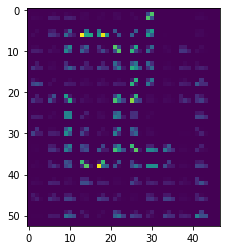

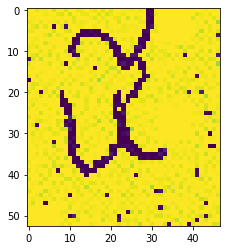

In [ ]:
feature_sample, hog_image = hog(Image.open(link_train[10000]), orientations=5, pixels_per_cell=(4,4),cells_per_block=(4,4), visualize=True)
print(feature_sample)

plt.figure()
plt.imshow(hog_image)
plt.figure()
plt.imshow(Image.open(link_train[10000]))

In [ ]:
feature_train = []
feature_test = []

for img_link in link_train:
    img = Image.open(img_link)
    feature = hog(img, orientations=5, pixels_per_cell=(4,4),cells_per_block=(4,4))
    feature_train.append(feature)

for img_link in link_test:
    img = Image.open(img_link)
    feature = hog(img, orientations=5, pixels_per_cell=(4,4),cells_per_block=(4,4))
    feature_test.append(feature)

In [ ]:
X_train = np.array(feature_train)
X_test = np.array(feature_test)

In [ ]:
Y_train = np.array(label_train)
Y_test = np.array(label_test)

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(11865, 6400) (2984, 6400)
(11865,) (2984,)


In [ ]:
print(Y_train)

[ 0  0  0 ... 88 88 88]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import r2_score, classification_report

In [ ]:
model1 = SVC(max_iter=10000)
model1.fit(X_train, Y_train)

KeyboardInterrupt: ignored

In [ ]:
y_pred = model1.predict(X_test)
print(r2_score(Y_test, y_pred))